In [68]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2
Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [70]:
df= pd.read_csv('aug_train.csv')

In [71]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [73]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [74]:
total = df.shape[0]

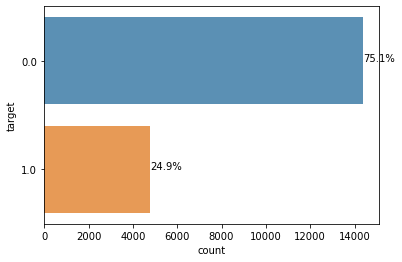

In [75]:
ax = sns.countplot(y="target", data=df, alpha=0.8)
total = df.shape[0]

for p in ax.patches:
    percent = '{:.1f}%'.format(100*(p.get_width()/total))
    x = p.get_x()+p.get_width()
    y = p.get_y()+(p.get_height())/2
    ax.annotate(percent,(x,y))


 We can see that this data set is imbalanced Data set since only 25% of people in target data is looking for job change 


In [76]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<AxesSubplot:>

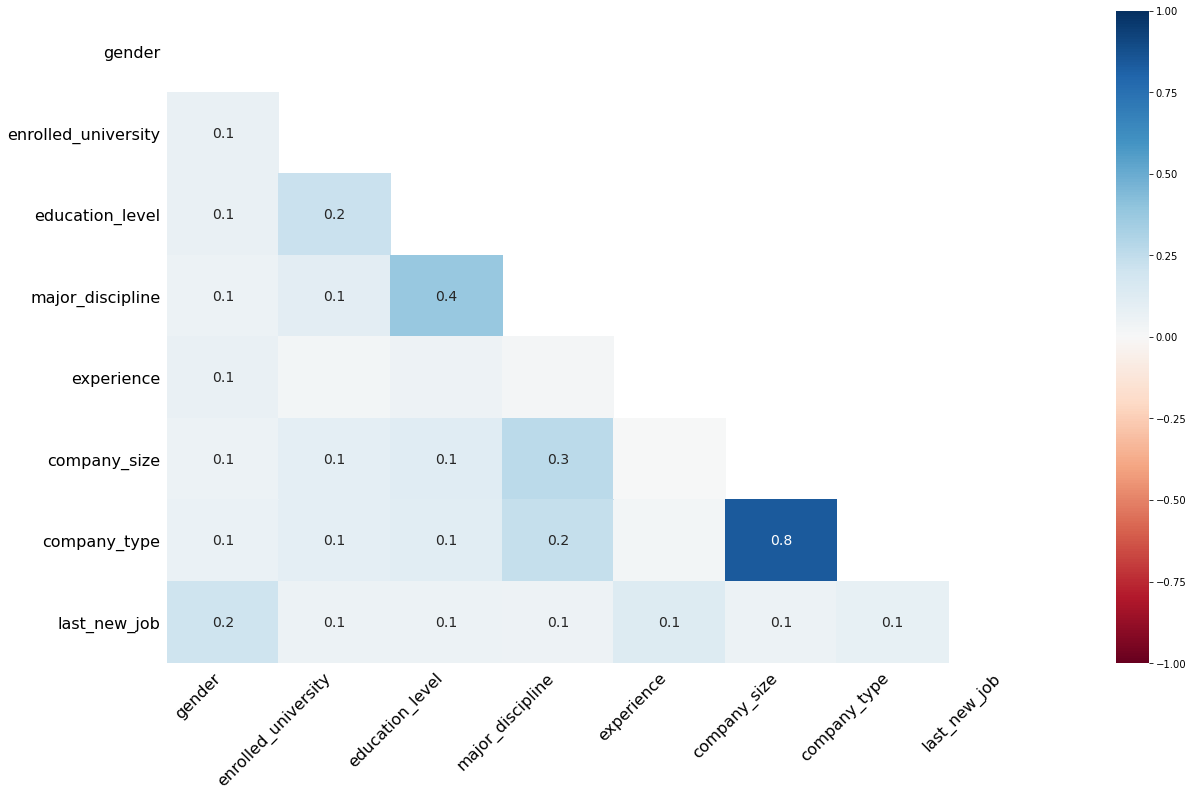

In [78]:
msno.heatmap(df)

In [104]:
index = df.dtypes[df.dtypes == object].index

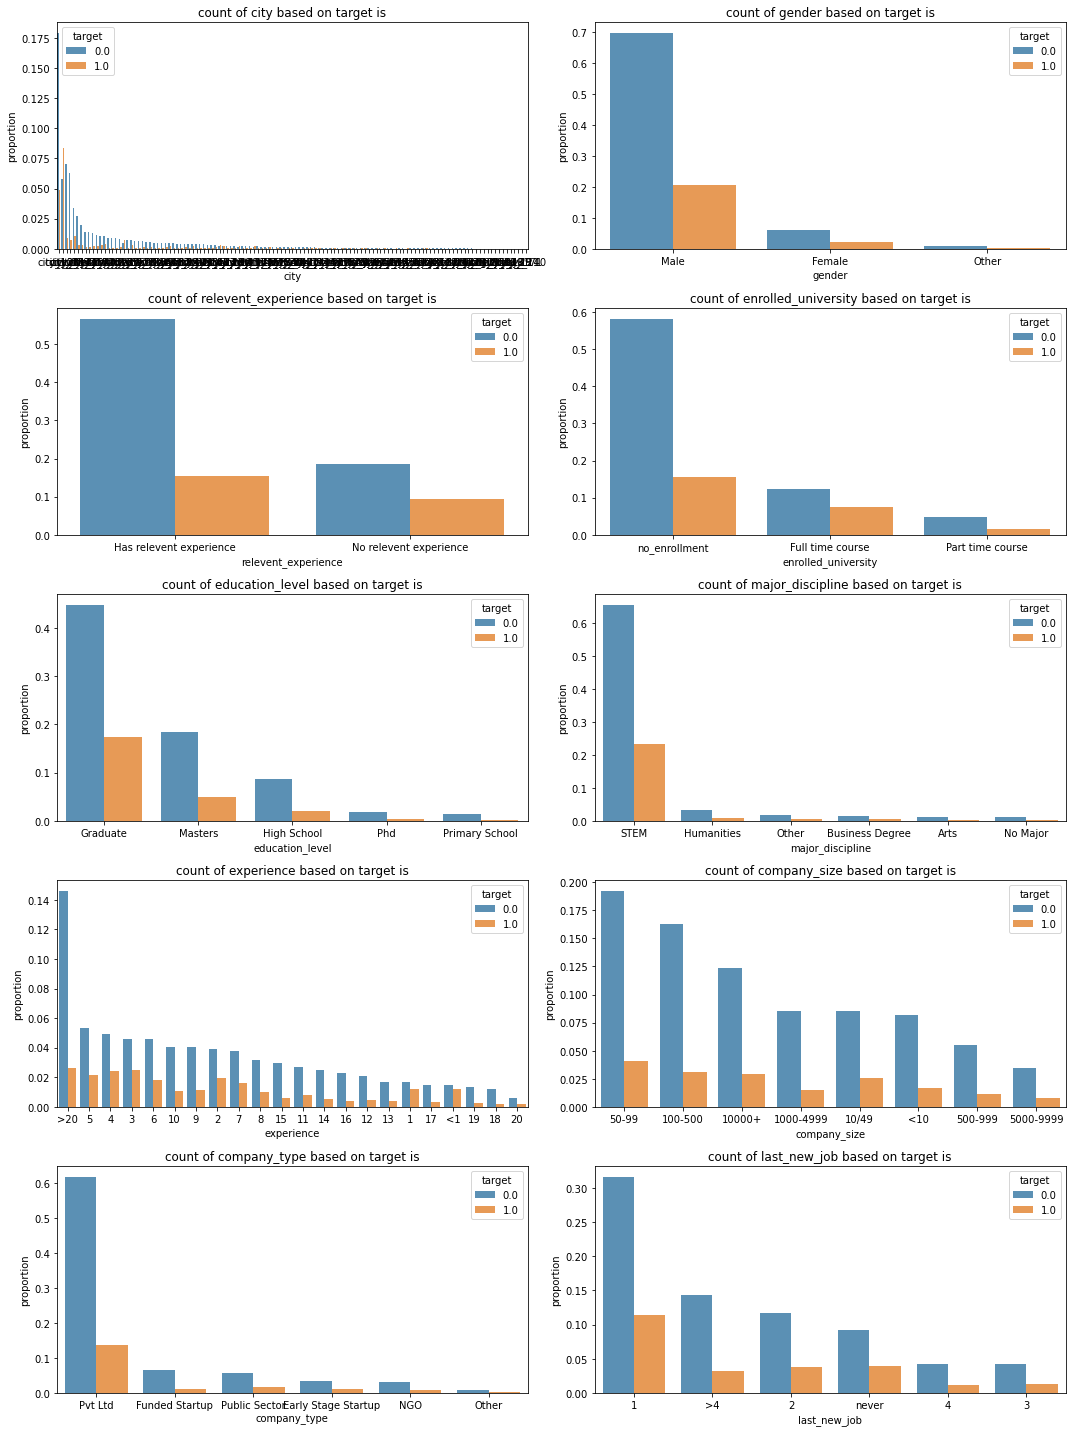

In [133]:
m= 1
plt.figure(figsize=[15,20])
y, hue = "proportion", "target"
for i in index:
    plt.subplot(5,2,m)
    ### we can normalise the data and plot which would make the plot to run faster, and give a clear analysis
    df[[i,'target']].value_counts(normalize= True).rename('proportion').reset_index().pipe((sns.barplot,'data'),x=i,y = 'proportion', hue= 'target', alpha =.8)
    #sns.countplot(x=i,hue='target',data=df)
    m = m+1
    plt.tight_layout()
    plt.title('count of {} based on target is'.format(i))

> on second graph Male propotion is higher and most of them are not looking for job change,it doesn't give any information.

> on third graph People who have relevent experience are not looking for job change.

> on fourth graph we can see people who invlved in full time courses are more likely looking for job change. 

> on fifth graph people who have 4,5,3,6,1,2 are more likely looking for a job change when compare to the propotion of other experienced people.

> on six graph most of the people are fromm PVT Ltd


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

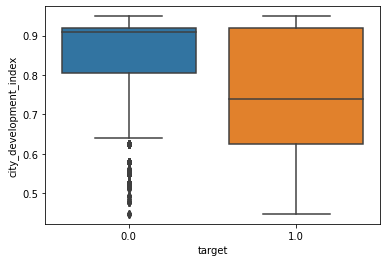

In [145]:
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='target'
ylabel = 'city_development_index'


> we can see that most of the people liveing in city having index more than 9 are not looking for the job change

> Similarly most of the people living in city having low index are looking for job change

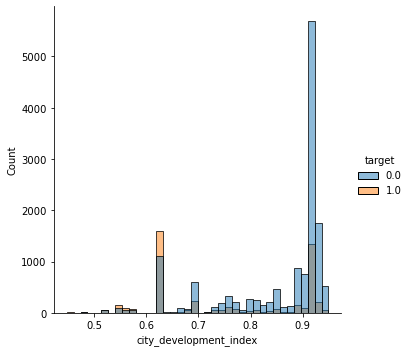

In [159]:
sns.displot(x ='city_development_index',hue='target',data =df)

> we can see that most of the people live in th city index  near 0.9 doesn't look for the job change

>  but the people living in city index near .6 more likely looking for job change 

<AxesSubplot:xlabel='target', ylabel='training_hours'>

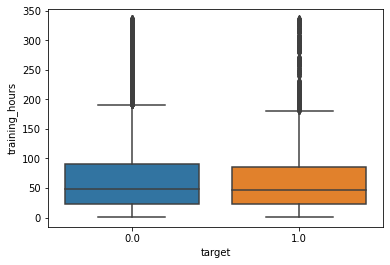

In [162]:
sns.boxplot(y = 'training_hours',x = 'target',data=df)

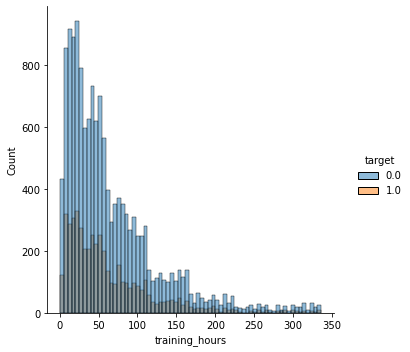

In [164]:
sns.displot(x='training_hours',hue= 'target',data = df)

we can see that people having traing hours of 0-50 are more likely looking for the job

<AxesSubplot:xlabel='company_size', ylabel='city_development_index'>

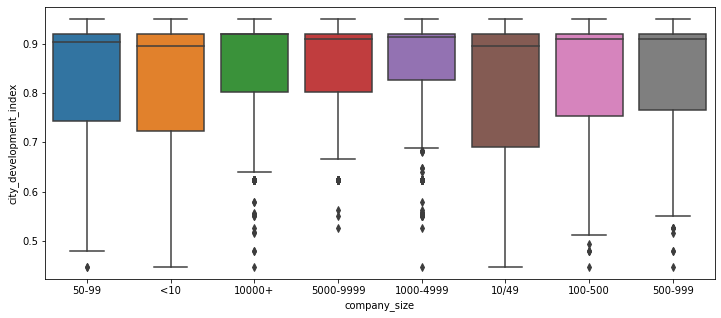

In [176]:
plt.figure(figsize=(12,5))
sns.boxplot(x='company_size',y='city_development_index',data=df)


Here we can see most of the companies are in city index more than .9 

<AxesSubplot:xlabel='company_type', ylabel='city_development_index'>

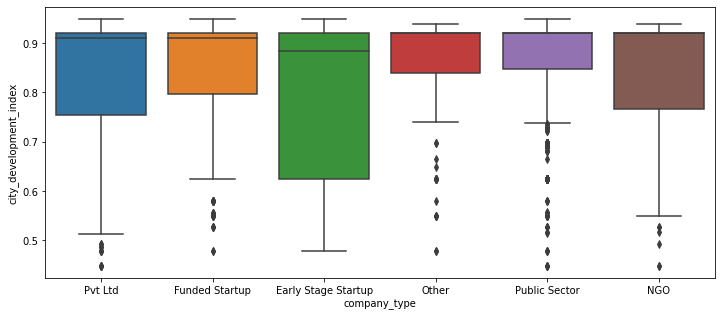

In [179]:
plt.figure(figsize=(12,5))
sns.boxplot(x='company_type',y='city_development_index',data=df)

here we can see most of the PVT Ltd,Funded startup companies are from city of index more than .9

<AxesSubplot:xlabel='enrolled_university', ylabel='training_hours'>

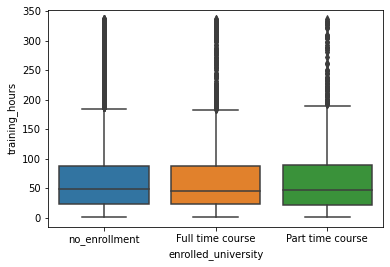

In [181]:
sns.boxplot(x='enrolled_university',y='training_hours',data=df)